In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# LOAD THE DATA

In [2]:
df = pd.read_csv('D://DATA//Advertising.csv')

Explore the Data

In [5]:
df.head()
df.tail()
df.head(6)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


In [7]:
# df.corr()

In [8]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [9]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


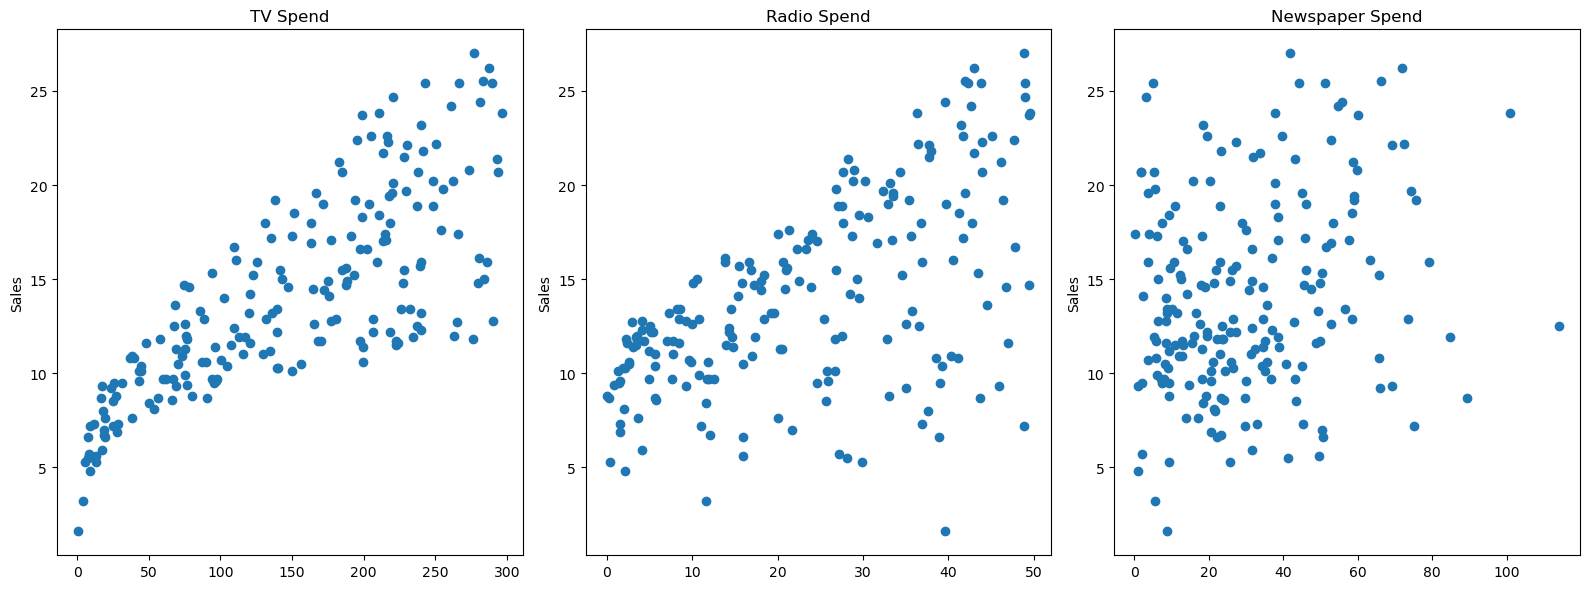

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'],'o')
axes[1].set_ylabel("Sales")
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'],'o')
axes[2].set_ylabel("Sales")
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

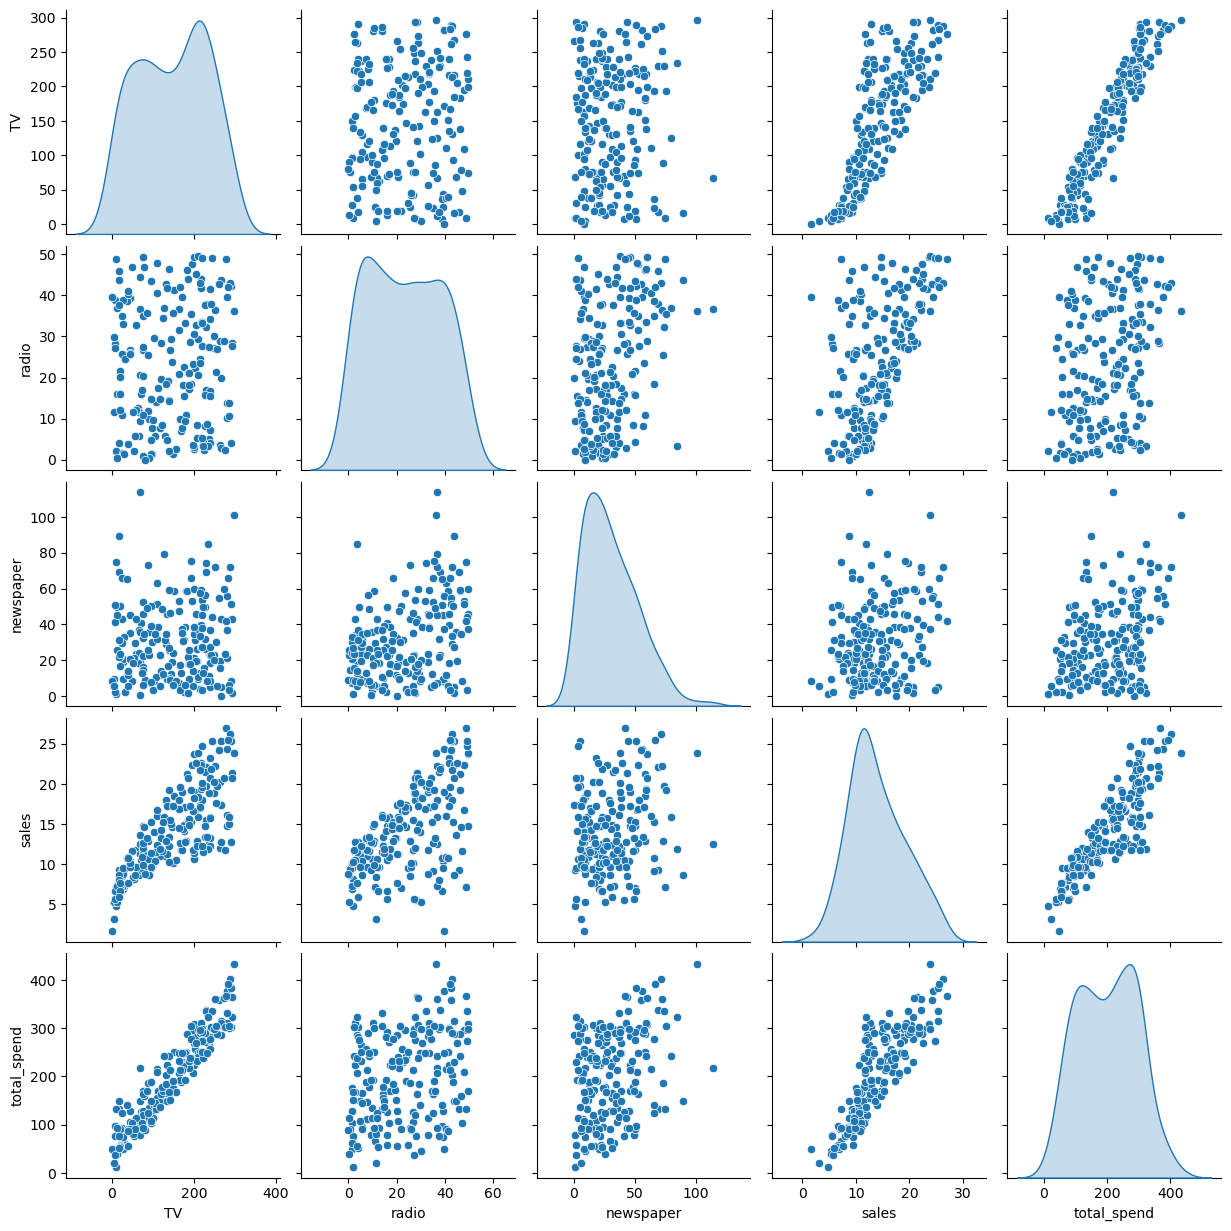

In [14]:
sns.pairplot(df ,diag_kind='kde')

Creating a model for future predictions using scikit learn module

In [22]:
# Create our feature cols
X = df.drop('sales', axis=1)
X = X.drop('total_spend', axis=1)

#Create ur target col
y = df['sales']

In [23]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


Train | Test Spilt of Data

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
# help(train_test_split)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression

In [31]:
# help(LinearRegression)
model = LinearRegression()

Train the Model

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
test_predictions = model.predict(X_test)

In [34]:
test_predictions

array([15.64343813, 19.58078283, 11.42717781, 16.90494334,  9.17645232,
        7.01921001, 20.24548588, 17.27288092,  9.81362002, 19.15221858,
       12.36281849, 13.90086335, 13.74679921, 21.16322282, 18.31876004,
        9.96472602, 15.56312703,  7.73452007,  7.57314037, 20.32745421,
        7.79414911, 18.16308067, 24.57041484, 22.71055089,  8.01558318,
       12.65730219, 21.43661308,  8.04499619, 12.43159447, 12.40259255,
       10.70029092, 19.16776811, 10.10150532,  6.69083331, 17.24889776,
        7.79224406,  9.25952001,  8.31516806, 10.51963092, 10.67086792,
       12.88094679,  9.79344981, 10.20060813,  8.013982  , 11.54267429,
       10.07800983,  8.98583386, 16.21285502, 13.20750313, 20.70094692,
       12.42670309, 13.96572233, 17.55475937, 11.15936616, 12.58108647,
        5.54230087, 23.22486082, 12.58536565, 18.76366836, 15.15376302,
       15.15931391, 23.91773675,  6.78191588, 19.84529505, 13.86858162,
       21.07676645])

In [35]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
       ... 
183    26.2
127     8.8
53     21.2
100    11.7
93     22.2
Name: sales, Length: 66, dtype: float64

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [38]:
MAE, MSE, RMSE

(1.2369188494259309, 2.348375242713826, 1.5324409426512415)

In [40]:
df['sales'].mean()

14.022500000000003

In [ ]:
# new_pred = model.predict(ur data(TV, radio, newspaper) in a DF)